# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how= "outer")

# Display the data table for preview
print(merged_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [9]:
# Checking the number of mice.
print("number of unique mice IDs in the merged data:", len(merged_data["Mouse ID"].unique()))

number of unique mice IDs in the merged data: 249


In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
print("\nData associated with duplicate mouse ID(s):")
print(merged_data[merged_data["Mouse ID"].isin(duplicate_mouse_ids)])

# Create a new DataFrame with duplicate mouse ID data removed
cleaned_data = merged_data[~merged_data["Mouse ID"].isin(duplicate_mouse_ids)]

# Display the updated number of unique mice IDs in the cleaned data
print("\nNumber of unique mice IDs in the cleaned data:", len(cleaned_data["Mouse ID"].unique()))


Data associated with duplicate mouse ID(s):
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Pr

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

## Group the data by drug regimen
grouped_data = cleaned_data.groupby("Drug Regimen")

##Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

## Rename the columns for clarity
summary_state = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Variance Tumor Volume",
    "std": "Standard Deviation Tumor Volume",
    "sem": "SEM Tumor Volume"
})

##Display the summary statistics table
print(summary_stats)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# Use the aggregation method to calculate mean, median, variance, standard deviation, and SEM in a single line
summary_stats = grouped_data["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std="std",
    sem="sem"
)

# Display the summary statistics table
print(summary_stats)

                   mean     median   variance       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

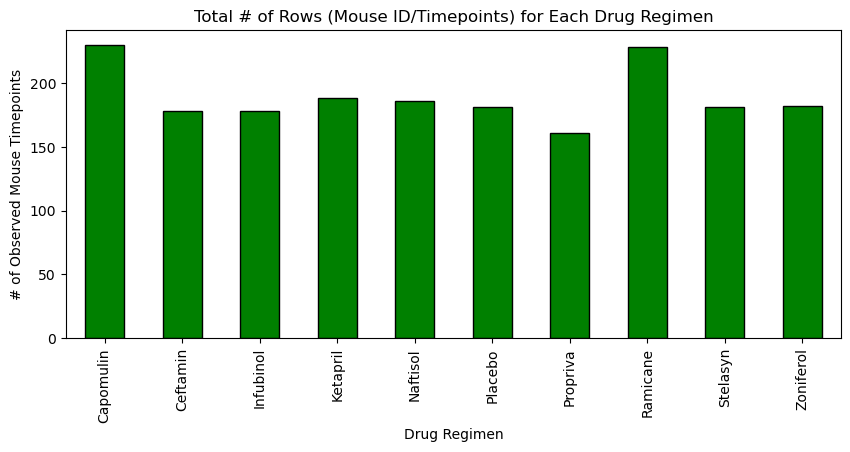

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

##Group the data by drug regimen and count the # of rows
regimen_counts = merged_data.groupby("Drug Regimen").size()

##create the bar plt
regimen_counts.plot(kind="bar", figsize=(10, 4), color="green", edgecolor="black")

##Add the x&y labels and the title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total # of Rows (Mouse ID/Timepoints) for Each Drug Regimen")

##Display the plot
plt.show()

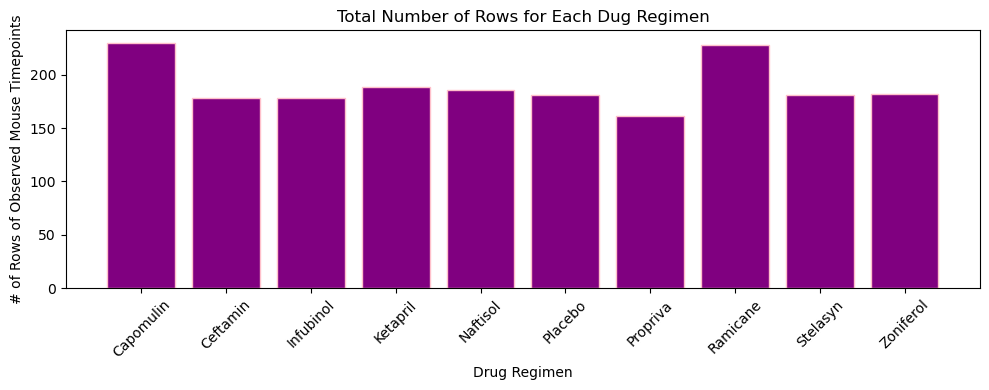

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

##Create a bar plot
plt.figure(figsize=(10, 4))
plt.bar(regimen_counts.index, regimen_counts.values, color="purple", edgecolor="pink")

##Add x&y labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Rows of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Dug Regimen")
plt.xticks(rotation=45)

##display the plot
plt.tight_layout()
plt.show()


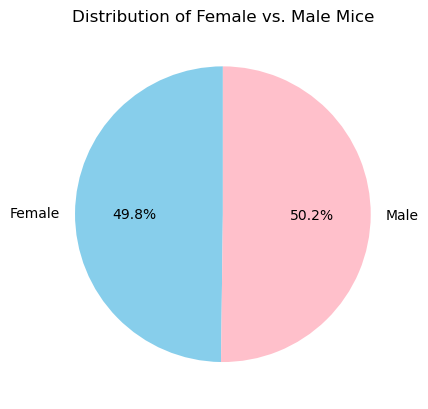

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

##Group data by sex and count the # of unique mouse IDs
sex_distr=merged_data.groupby("Sex")["Mouse ID"].nunique()

## Create a pid plot
sex_distr.plot(kind="pie",autopct="%1.1f%%", colors=["skyblue", "pink"], startangle=90)

##Add the title
plt.title("Distribution of Female vs. Male Mice")

##Display the plot
plt.ylabel("")
plt.show()

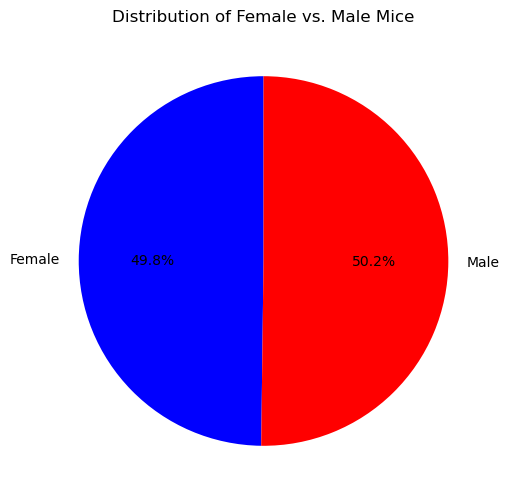

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

##Create a pit plot
plt.figure(figsize=(6, 6))
plt.pie(sex_distr, labels=sex_distr.index, autopct="%1.1f%%", colors=["blue", "red"], startangle=90)

##Add title
plt.title("Distribution of Female vs. Male Mice")

##Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

## List of treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

## Get the last (greatest) timepoint for each mouse
last_timepoints = merged_data.groupby("Mouse ID")["Timepoint"].max()

## Merge the last timepoints DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(
    last_timepoints, merged_data, on=["Mouse ID", "Timepoint"], how="left"
)[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

## Filter the DataFrame to include only the specified treatment regimens
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_regimens)]

## Display the final tumor volume DataFrame
print(final_tumor_volume)


    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

## Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
## Create an empty list to fill with tumor vol data for plotting
tumor_vol_data =[]

##Loop through each treatment regimen

for treatment in treatments:
    ##find rows that contain mice on each drug and get tumor volumes
    tumor_vol = merged_data.loc[merged_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
    
    ##Add tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    ##Calculate the quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    ##Determine outliers
    lower_bound = lowerq- (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    ## Print Summary stats
    print(f"Summary statistics for {treatment}:")
    print(f" - Lower Quartile: {lowerq}")
    print(f" - Upper Quartile: {upperq}")
    print(f" - Interquartile Range (IQR): {iqr}")
    print(f" - Lower Bound: {lower_bound}")
    print(f" - Upper Bound: {upper_bound}")
    print(f" - Potential outliers: {outliers}\n")
    

Summary statistics for Capomulin:
 - Lower Quartile: 37.685932865
 - Upper Quartile: 45.0
 - Interquartile Range (IQR): 7.314067135000002
 - Lower Bound: 26.714832162499995
 - Upper Bound: 55.9711007025
 - Potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Summary statistics for Ramicane:
 - Lower Quartile: 36.674634585
 - Upper Quartile: 45.0
 - Interquartile Range (IQR): 8.325365415
 - Lower Bound: 24.1865864625
 - Upper Bound: 57.488048122500004
 - Potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64

Summary statistics for Infubinol:
 - Lower Quartile: 47.3123533
 - Upper Quartile: 57.314443967500004
 - Interquartile Range (IQR): 10.002090667500006
 - Lower Bound: 32.309217298749985
 - Upper Bound: 72.31757996875001
 - Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Summary statistics for Ceftamin:
 - Lower Quartile: 47.2084271125
 - Upper Quartile: 56.801437570000004
 - Interquartile Range 

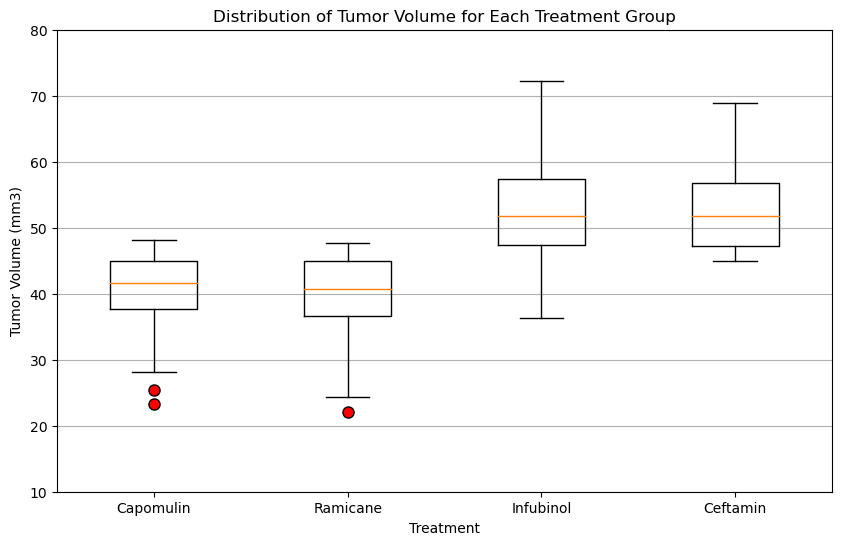

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(10, 80)  # Set y-axis limits for better visibility
plt.grid(axis='y')  # Add gridlines to the plot
plt.show()

## Line and Scatter Plots

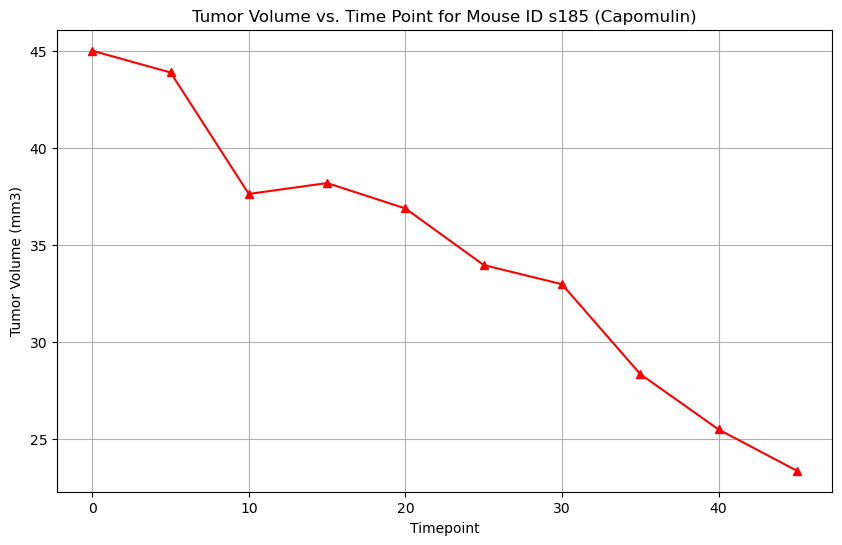

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
## Choose a single mouse ID treated with Capomulin
mouse_id = "s185"

## Filter the merged_data DataFrame for the selected mouse ID and Capomulin treatment
mouse_data = merged_data[(merged_data["Mouse ID"] == mouse_id) & (merged_data["Drug Regimen"] == "Capomulin")]

## Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='^', color='r')

## Add labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)")

## Display the plot
plt.grid(True)
plt.show()

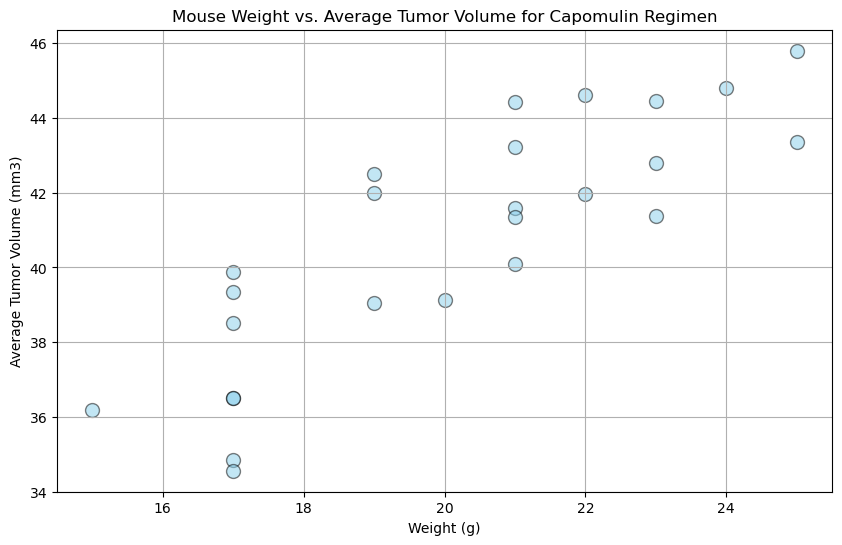

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

## Group the merged_data DataFrame by Mouse ID and calculate the average tumor volume and weight for each mouse
mouse_grouped = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
avg_tumor_volume = mouse_grouped["Tumor Volume (mm3)"].mean()
avg_weight = mouse_grouped["Weight (g)"].mean()

## Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(avg_weight, avg_tumor_volume, marker='o', facecolors='skyblue', edgecolors='black', s=100, alpha=0.50)

## Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

## Display the plot
plt.grid(True)
plt.show()

## Correlation and Regression

In [40]:
from scipy.stats import linregress

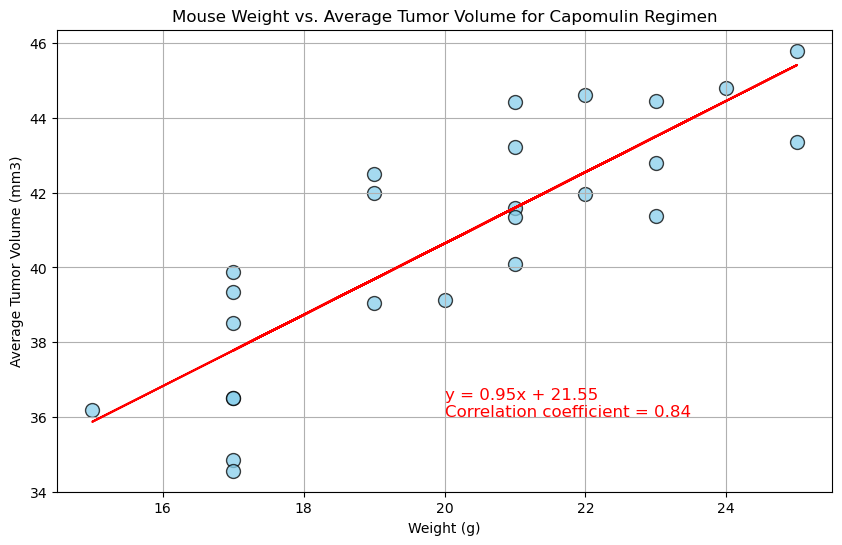

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(avg_weight, avg_tumor_volume)[0]

# Create a scatter plot with the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_weight, avg_tumor_volume, marker='o', facecolors='skyblue', edgecolors='black', s=100, alpha=0.75)
plt.plot(avg_weight, regress_values, color='red')

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Add the regression equation and correlation coefficient to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nCorrelation coefficient = {correlation:.2f}"
plt.annotate(line_eq, (20, 36), fontsize=12, color='red')

# Display the plot
plt.grid(True)
plt.show()